![alt text](1.png "Title")

In [19]:
import pandas as pd

star_dataset = pd.read_csv('star_dataset.csv')

star_dataset = star_dataset[(star_dataset['Spectral Class'] == 'B') | (star_dataset['Spectral Class'] == 'O')]

star_dataset_2features = star_dataset[['Temperature (K)','Absolute magnitude(Mv)']]

X_features = star_dataset_2features.to_numpy()

### <font color=blue>1. Maximum Likelihood</font> ###

__Report Mean and Covariance values for each class__

In [20]:
from sklearn.covariance import empirical_covariance


In [24]:
X_B = star_dataset_2features[star_dataset['Spectral Class'] == 'B']
X_O = star_dataset_2features[star_dataset['Spectral Class'] == 'O']

In [27]:
print('X_B Covariance =\n', empirical_covariance(X_B), '\n')
print('X_O Covariance =\n', empirical_covariance(X_O), '\n')

X_B Covariance =
 [[ 3.75467284e+07 -2.67843319e+04]
 [-2.67843319e+04  7.51544584e+01]] 

X_O Covariance =
 [[ 1.09342188e+08 -6.18115637e+02]
 [-6.18115637e+02  2.23654314e+00]] 



### <font color=blue>2. Bayesian Density Estimation</font> ###
__1. Report Mean and Covariance values for each class__<br>

In [28]:
from sklearn.mixture import BayesianGaussianMixture

In [36]:
BDE = BayesianGaussianMixture(n_components=2, covariance_type='full').fit(X_features)
print('\u03BC = \n', BDE.means_)
print('\u03A3 = \n', BDE.covariances_)

μ = 
 [[ 2.23633662e+04 -5.98818976e+00]
 [ 1.69991200e+04  1.12995212e+01]]
Σ = 
 [[[ 8.50458322e+07 -1.97807056e+03]
  [-1.97807056e+03  5.75523053e+00]]

 [[ 1.72474772e+07 -4.40575411e+03]
  [-4.40575411e+03  9.39781836e+00]]]


### <font color=blue>3. Expectation Maximization</font> ###
__1. Report Mean and Covariance values for each class__<br>
__2. Plot the Clusters__

In [30]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [37]:
GMM = GaussianMixture(n_components=2, covariance_type='full').fit(X_features)
print('Converged:', GMM.converged_)
means = GMM.means_
covariances = GMM.covariances_

print('\u03BC = \n', means)
print('\u03A3 = \n', covariances)

Converged: True
μ = 
 [[ 2.23878871e+04 -6.06737097e+00]
 [ 1.68391667e+04  1.18154167e+01]]
Σ = 
 [[[ 8.65636517e+07 -1.56714093e+03]
  [-1.56714093e+03  4.44045265e+00]]

 [[ 1.49760780e+07 -1.80027465e+03]
  [-1.80027465e+03  6.74842493e-01]]]


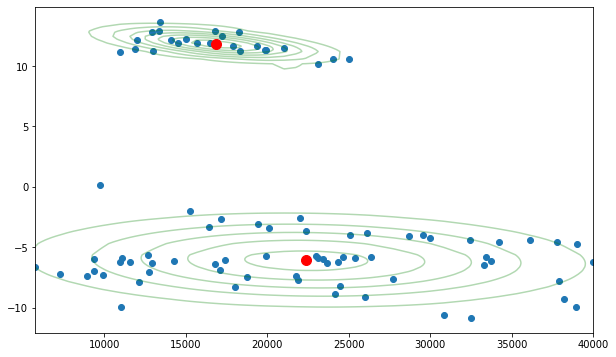

In [39]:
def plot_clusters(X_features, means, covariances):
    x,y = np.meshgrid(np.sort(X_features[:,0]),np.sort(X_features[:,1]))
    XY = np.array([x.flatten(),y.flatten()]).T

    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(X_features[:,0],X_features[:,1])
    for m,c in zip(means,covariances):
        multi_normal = multivariate_normal(mean= m,cov= c)
        ax.contour(np.sort(X_features[:,0]),np.sort(X_features[:,1]),multi_normal.pdf(XY).reshape(len(X_features),len(X_features)),colors='green',alpha=0.3)
        ax.scatter(m[0],m[1],c='red',zorder=10,s=100)

plot_clusters(X_features, means, covariances)

### <font color=blue>4. Gaussian HMM</font><br> ###

__1. Write the Transition Matrix and Emission Matrix__<br><br>
__2. What is the probability of <font color=green>Sunny, Rainy, Rainy, Rainy, Snowy, Snowy</font>? (No need to code!)__<br><br>
__3. Suppose that a man wore <font color=green>Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat</font>. What is the most likely weather condition in these 7 consecutive days?__

In [41]:
import numpy as np
from hmmlearn import hmm

### 4.1

In [60]:
states = ["Sunny", "Rainy", "Snowy"]
n_states = len(states)

observations = ["T-shirt", "Coat", "Umbrella"]
n_observations = len(observations)

model = hmm.MultinomialHMM(n_components = n_states, init_params= "", params= "")

model.startprob_ = np.array([0.7, 0.25, 0.05])    

model.transmat_ = np.array([[0.8, 0.15, 0.05],
                            [0.38, 0.6, 0.02],
                            [0.75, 0.05, 0.2]])

model.emissionprob_ = np.array([[0.6, 0.3, 0.1],
                                 [0.05, 0.3, 0.65],
                                 [0, 0.5, 0.5]])

print('transition matrix:\n', model.transmat_, '\n')
print('emission matrix:\n', model.emissionprob_)

transition matrix:
 [[0.8  0.15 0.05]
 [0.38 0.6  0.02]
 [0.75 0.05 0.2 ]] 

emission matrix:
 [[0.6  0.3  0.1 ]
 [0.05 0.3  0.65]
 [0.   0.5  0.5 ]]


### 4.2 what is the probability of Sunny, Rainy, Rainy, Rainy, Snowy, Snowy?

In [74]:
v = ['Sunny', 'Rainy', 'Rainy', 'Rainy', 'Snowy', 'Snowy']
idx_dict = {'Sunny':0, 'Rainy':1, 'Snowy':2}

p = model.startprob_[0]

for k in range(len(v)-1):
    print()
    i = idx_dict[v[k]]
    j = idx_dict[v[k+1]]
    p *= model.transmat_[i][j]

print('probability of this observation vector = {}%'.format(round(p*100, 3)))






probability of this observation vector = 0.015%


### 4.3

In [61]:
# predict a sequence of hidden states based on visible states
sto = np.array([[1, 1, 2, 2, 0, 2, 1]]).T

model = model.fit(sto)
logprob, hs = model.decode(sto, algorithm="viterbi")
print("Observation:", sto.T)
print("States:", hs)

print("Color of the shirt is:", ", ".join(map(lambda x: observations[int(x)], sto)))
print("States are:", ", ".join(map(lambda x: states[int(x)], hs)))

Observation: [[1 1 2 2 0 2 1]]
States: [1 1 1 1 0 0 0]
Color of the shirt is: Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat
States are: Rainy, Rainy, Rainy, Rainy, Sunny, Sunny, Sunny
